In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('dfwavgscores.xlsx')

In [2]:
demographic_info_columns = ['Country', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASDAGE','avgscore']

In [3]:
df_demo = df[demographic_info_columns]

Let's drop all the values that have 9s - omitted. I'm not sure if this is really what I want to do but let's see. 

In [4]:
df_demo.shape 

(41365, 18)

In [5]:
# Columns to check
columns_to_check = ['ASBH02A','ASBH02B','ASBH03A','ASBH04','ASBH16','ASBH18AA','ASBH18AB']

# Drop rows where any of the specified columns have a value of 9.0
condition = (df_demo[columns_to_check] != 9.0).all(axis=1)
df_cleaned = df_demo.loc[condition]
df_cleaned.shape

(40810, 18)

In [6]:
# Columns to check
columns_to_check2 = ['ASBH15A','ASBH15B','ASBH17A','ASBH17B']

# Drop rows where any of the specified columns have a value of 999.0
condition = (df_cleaned[columns_to_check2] != 999.0).all(axis=1)
df_cleaned2 = df_cleaned.loc[condition]
df_cleaned2.shape

(40810, 18)

let's look at the columns that all countries have answers for - 02B - age when arrived in country and 3a speaking lang of test before school? check this!

In [7]:
df_cleaned2.head()

,Country,ASBH02A,ASBH02B,ASBH03A,ASBH04,ASBH15A,ASBH15B,ASBH16,ASBH17A,ASBH17B,ASBH18AA,ASBH18AB,ASBG01,ASBG03,MINAGEARRIVAL,rounded_ages,ASDAGE,avgscore
0,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.17,555.811163
1,Turkey,Yes,6,Yes,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.42,558.507703
2,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.50,563.484052
3,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.58,581.597414
4,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.58,559.048650


In [9]:
df_cleaned2['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    40349
0.0      162
3.0      143
6.0      102
8.0       54
Name: MINAGEARRIVAL, dtype: int64

In [10]:
condition = (df_cleaned2['MINAGEARRIVAL'] == 0.0)

In [11]:
df_cleaned2.loc[condition,'MINAGEARRIVAL'] = 1.0

In [12]:
df_cleaned2['MINAGEARRIVAL'].value_counts()

1.0    162
3.0    143
6.0    102
8.0     54
Name: MINAGEARRIVAL, dtype: int64

In [14]:
df_cleaned2['MINAGEARRIVAL'] = df_cleaned2['MINAGEARRIVAL'].fillna(0)

In [15]:
df_cleaned2['MINAGEARRIVAL'].value_counts()

0.0    40349
1.0      162
3.0      143
6.0      102
8.0       54
Name: MINAGEARRIVAL, dtype: int64

In [13]:
df_cleaned2['ASBH02B'].value_counts()

6                           12935
Younger than 3 years old      928
3 to 5 years old              692
6 to 7 years old              375
8 years old or older          186
1                             162
2                             143
3                             102
4                              54
Name: ASBH02B, dtype: int64

In [16]:
def populate_column(row):
    if row['ASBH02B'] == 'Younger than 3 years old':
        return 1
    elif row ['ASBH02B'] == 6:
        return 0
    elif row['ASBH02B'] == '3 to 5 years old':
        return 3
    elif row['ASBH02B'] == '6 to 7 years old':
        return 6
    elif row['ASBH02B'] == '8 years old or older':
        return 8
    else:
        return row['MINAGEARRIVAL']  

# Apply the function to each row
df_cleaned2['MINAGEARRIVAL'] = df_cleaned2.apply(populate_column, axis=1)

In [18]:
df_cleaned2['MINAGEARRIVAL'].value_counts()

0.0    38168
1.0     1090
3.0      835
6.0      477
8.0      240
Name: MINAGEARRIVAL, dtype: int64

In [19]:
pivot_minage = df_cleaned2.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [20]:
pivot_minage

MINAGEARRIVAL,0.0,1.0,3.0,6.0,8.0
Country,,,,,
Austria,535.931404,524.691549,503.023525,482.467533,472.698753
Egypt,380.234984,382.087467,360.526565,353.167965,359.496124
France,522.219901,514.789067,500.251059,487.735549,449.952812
Germany,547.194744,521.986539,490.961791,485.084177,517.617192
Iran,423.246228,415.102270,429.928154,450.368901,421.684960
Jordan,368.776349,380.605999,385.670465,381.076742,372.786823
Netherlands,544.917812,546.704431,510.434272,532.347393,529.268667
Sweden,565.960709,547.588860,506.832225,496.426190,486.933911
Turkey,507.296871,460.361803,439.893039,471.000542,446.103548


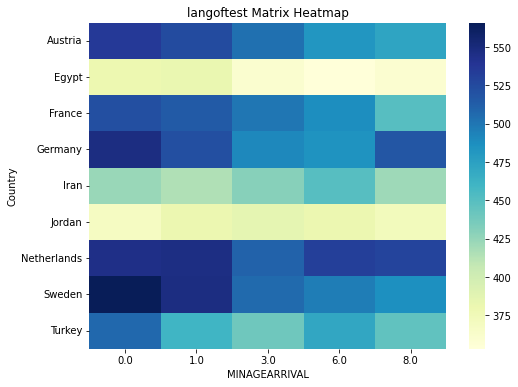

In [23]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_minage, annot=False, cmap='YlGnBu')

# Add a title
plt.title('langoftest Matrix Heatmap')

# Show the plot
plt.show()

We do not need to include the ASBH02A column - we can just assign 0 or -1 to all the kids who were born in country/

Now I need to put the above back into the main document

In [ ]:
correlation_matrix = df_demo.corr()

In [ ]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

`ASBH02A	GEN\CHILD BORN IN <COUNTRY>\
ASBH02B	GEN\AGE OF CHILD WHEN CAME TO <COUNTRY>\
ASBH03A	GEN\LANGUAGE<LANGUAGE OF TEST>\
ASBH04	GEN\HOW OFTEN <LANG OF TEST> AT HOME\
ASBH15A	GEN\LVL OF EDUCATIONGUARDIAN A\
ASBH15B	GEN\LVL OF EDUCATIONGUARDIAN B\
ASBH16	GEN\LVL OF EDUCATIONCHILD\
ASBH17A	GEN\WHAT KIND OF MAIN JOB\GUARDIAN A\
ASBH17B	GEN\WHAT KIND OF MAIN JOB\GUARDIAN B\
ASBH18AA	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN A\
ASBH18AB	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN B\
ASBH18BA	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN A\
ASBH18BB	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN B`

With the above I just want to focus on the bottom row really - remove the rest? There is a light negative correlation between speaking the language of test at home and the average score. Also those whose parents have more education have performed better overall. However, we can only use numerical columns for a correlation matrix. For non-numerical columns we can try the methods below.

# Non-numeric

## The below is for comparing columns that are non-numeric. It might be worthwhile to hot-code!? these columns so that we can do .corr with them. Like the ones above. I also want to look at the ones above in more detail.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

In [ ]:
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

## Interpretation

Chi-Square Test Statistic: 41365.00000000001
P-value: 0.49630132644040176

The P-value of approximately 0.496 suggests that there is a 49.6% chance of obtaining a Chi-Square Test Statistic of 41365 or higher under the assumption that the null hypothesis is true (i.e., there is no association between the variables). Since this P-value is much larger than 0.05, we do not have enough evidence to reject the null hypothesis.

Conclusion
There is no significant association between the variables in the contingency table. The high Chi-Square Test Statistic value seems unusual given the high P-value, which suggests that there might be an issue with the data or the way the test was performed. It might be useful to recheck the data or the contingency table to ensure there are no errors or anomalies.

In [ ]:
# Create a box plot
sns.boxplot(x=df['avgscore'])

# Add title and labels
plt.title('Box Plot of Your Data')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()

Interpretation
Central Box: Represents the interquartile range (IQR), containing the middle 50% of the data.
Line inside the Box: Indicates the median of the data.
Whiskers: Extend to the smallest and largest values within 1.5 * IQR from the lower and upper quartiles.
Dots outside the Whiskers: Represent potential outliers.


## do a scatter plot\ ask chatgpt about regression and clustering

## want to do experiment with crosstab - adding more columns

I think my data is normally distributed because there is an obvious dip for specific countries but there are no crazy dips or heights that are not normal for the country. 

In [ ]:
import plotly.express as px

# Create a contingency table with the original data
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore', value_name='count')

# Plot the heatmap using Plotly
fig = px.density_heatmap(contingency_table_melted, x='ASBH02A', y='avgscore', z='count', color_continuous_scale='coolwarm')
fig.update_layout(title='Heatmap of Frequency Counts')
fig.show()

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Create a confusion matrix
confusion_matrix = pd.crosstab(df['ASBH02A'], df['avgscore'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print(f"Cramér's V: {cramers_v_value}")

In [ ]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Encoded Categorical Data')
plt.show()

In [ ]:
# Sample a subset of the data
df_sample = df.sample(n=10)  # Adjust the sample size as needed

# Create a contingency table with the sample
contingency_table = pd.crosstab(df_sample['ASBH02A'], df_sample['avgscore'])

# Plot the heatmap with the sample
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=False, cmap='coolwarm')
plt.title('Heatmap of Frequency Counts')
plt.show()